# Análise de solicitação de crédito

**Objetivo desta análise**: determinar para cada solicitação de crédito o valor de **Risk** baseado nos outros atributos (por exemplo, Age, Sex, Job, Housing, ...).

Este dataset e a descrição do problema estão disponíveis em https://www.kaggle.com/uciml/german-credit

$Risk \leftarrow Age + Sex + Job + \cdots + Purpose$

Este dataset é um dataset desbalanceado. Na V1 deste script a medida utilizada para avaliar o modelo foi a acurácia. No entanto, acurácia não é a melhor medida para avaliar o desempenho de problemas cujo a variável de interesse é desbalanceada.

## Aquisição dos dados e pré-processamento

In [19]:
import pandas as pd
df = pd.read_csv("../../dataset/german_credit_data.csv")

In [20]:
type(df)

pandas.core.frame.DataFrame

In [21]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [22]:
df.shape

(1000, 11)

In [23]:
df = df.drop(columns=['Unnamed: 0'])

## Análise descritiva

In [24]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [25]:
df = df.rename(columns={
    "Age": "age", 
    "Sex": "sex", 
    "Job": "job", 
    "Housing": "housing", 
    "Saving accounts": "savingAccount",
    "Checking account": "checkingAccount",
    "Credit amount": "creditAmount",
    "Duration": "duration",
    "Purpose": "purpose",
    "Risk": "risk"
})

In [26]:
df.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [27]:
df['risk'].value_counts()

good    700
bad     300
Name: risk, dtype: int64

Visto que a variável Risk é categórica então podemos dizer que este é um problema de **classificação**.

Isto é importante para: 
* Definir as métricas de como o modelo será avaliado, e;
* Escolher o melhor algoritmo para criar o modelo.

Descrição dos atributos: 

* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* Housing (text: own, rent, or free)
* Saving accounts (text - little, moderate, quite rich, rich)
* Checking account (numeric, in DM - Deutsch Mark)
* Credit amount (numeric, in DM)
* Duration (numeric, in month)
* Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

*Dúvida*: deixamos o atributo Job como número ou transformamos para categórico? 

In [28]:
cleanup_nums = {"savingAccount": 
                {"little": 1, "moderate": 2, "quite rich": 3, "rich": 4}
               }
df.replace(cleanup_nums, inplace=True)
df.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,1.0,moderate,5951,48,radio/TV,bad
2,49,male,1,own,1.0,NaN,2096,12,education,good
3,45,male,2,free,1.0,little,7882,42,furniture/equipment,good
4,53,male,2,free,1.0,little,4870,24,car,bad


In [29]:
cleanup_nums = {"checkingAccount": 
                {"little": 1, "moderate": 2, "quite rich": 3, "rich": 4}
               }
df.replace(cleanup_nums, inplace=True)
df.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,risk
0,67,male,2,own,NaN,1.0,1169,6,radio/TV,good
1,22,female,2,own,1.0,2.0,5951,48,radio/TV,bad
2,49,male,1,own,1.0,NaN,2096,12,education,good
3,45,male,2,free,1.0,1.0,7882,42,furniture/equipment,good
4,53,male,2,free,1.0,1.0,4870,24,car,bad


<AxesSubplot:ylabel='Frequency'>

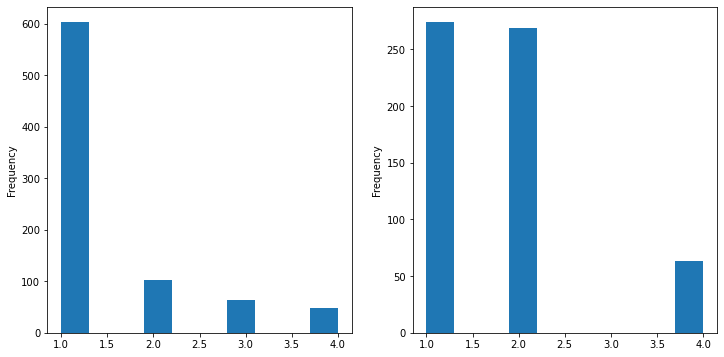

In [30]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 
df['savingAccount'].plot(kind='hist', ax=axes[0])
df['checkingAccount'].plot(kind='hist', ax=axes[1])

In [31]:
df.isnull().sum()

age                  0
sex                  0
job                  0
housing              0
savingAccount      183
checkingAccount    394
creditAmount         0
duration             0
purpose              0
risk                 0
dtype: int64

# Separando parte dos exemplos para validação final

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:9], df['risk'], test_size=0.1, random_state=4)

In [33]:
X_train.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose
239,39,male,2,own,1.0,1.0,2522,30,radio/TV
304,44,male,2,free,3.0,NaN,10127,48,car
964,22,male,1,own,1.0,2.0,454,6,repairs
102,24,female,2,own,1.0,NaN,932,6,radio/TV
867,42,male,2,own,1.0,NaN,3331,12,furniture/equipment


In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(900, 9)
(900,)
(100, 9)
(100,)


In [35]:
y_train.value_counts()

good    628
bad     272
Name: risk, dtype: int64

In [36]:
y_test.value_counts()

good    72
bad     28
Name: risk, dtype: int64

# Pré-processamento dos valores categóricos e missing

In [37]:
X_train.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose
239,39,male,2,own,1.0,1.0,2522,30,radio/TV
304,44,male,2,free,3.0,NaN,10127,48,car
964,22,male,1,own,1.0,2.0,454,6,repairs
102,24,female,2,own,1.0,NaN,932,6,radio/TV
867,42,male,2,own,1.0,NaN,3331,12,furniture/equipment


In [38]:
d_attr = pd.get_dummies(X_train[['sex','housing','purpose']], prefix=['sex','housing','purpose'])

In [39]:
print(d_attr.shape)
print(X_train.shape)

(900, 13)
(900, 9)


In [40]:
X_train_ = pd.concat([X_train, d_attr], axis=1)

In [41]:
X_train_.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,sex_female,...,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
239,39,male,2,own,1.0,1.0,2522,30,radio/TV,0,...,1,0,0,0,0,0,0,1,0,0
304,44,male,2,free,3.0,NaN,10127,48,car,0,...,0,0,0,1,0,0,0,0,0,0
964,22,male,1,own,1.0,2.0,454,6,repairs,0,...,1,0,0,0,0,0,0,0,1,0
102,24,female,2,own,1.0,NaN,932,6,radio/TV,1,...,1,0,0,0,0,0,0,1,0,0
867,42,male,2,own,1.0,NaN,3331,12,furniture/equipment,0,...,1,0,0,0,0,0,1,0,0,0


In [42]:
X_train_.shape

(900, 22)

In [43]:
X_train_.columns

Index(['age', 'sex', 'job', 'housing', 'savingAccount', 'checkingAccount',
       'creditAmount', 'duration', 'purpose', 'sex_female', 'sex_male',
       'housing_free', 'housing_own', 'housing_rent', 'purpose_business',
       'purpose_car', 'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/TV', 'purpose_repairs',
       'purpose_vacation/others'],
      dtype='object')

In [44]:
X_train_ = X_train_[['age', 'savingAccount', 'checkingAccount',
       'creditAmount', 'duration', 'sex_female', 'sex_male',
       'housing_free', 'housing_own', 'housing_rent', 'purpose_business',
       'purpose_car', 'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/TV', 'purpose_repairs',
       'purpose_vacation/others']]

In [45]:
X_train_.shape

(900, 18)

## Tratamento dos valores missing

### Removendo exemplos com valor missing

In [46]:
X_train_sem_NA = X_train_.dropna()

In [47]:
X_train_sem_NA.shape

(474, 18)

In [48]:
from sklearn import preprocessing
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X_train_semNA_scaled = pd.DataFrame(min_max_scaler.fit_transform(X_train_sem_NA), 
                                    index=X_train_sem_NA.index, 
                                    columns=X_train_sem_NA.columns
                                   )

In [49]:
X_train_semNA_scaled.head()

,age,savingAccount,checkingAccount,creditAmount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
239,0.357143,0.000000,0.000000,0.123760,0.363636,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
964,0.053571,0.000000,0.333333,0.009808,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
237,0.750000,0.333333,0.333333,0.137260,0.227273,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262,0.303571,0.000000,0.000000,0.276945,0.181818,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
822,0.392857,0.000000,0.000000,0.134230,0.454545,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Atribuindo o valor mais frequente para os valores missing

savingAccount = 1 e checkingAccount = 1

In [53]:
X_train_freq = X_train_.fillna(1)

In [54]:
X_train_freq.head()

,age,savingAccount,checkingAccount,creditAmount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
239,39,1.0,1.0,2522,30,0,1,0,1,0,0,0,0,0,0,1,0,0
304,44,3.0,1.0,10127,48,0,1,1,0,0,0,1,0,0,0,0,0,0
964,22,1.0,2.0,454,6,0,1,0,1,0,0,0,0,0,0,0,1,0
102,24,1.0,1.0,932,6,1,0,0,1,0,0,0,0,0,0,1,0,0
867,42,1.0,1.0,3331,12,0,1,0,1,0,0,0,0,0,1,0,0,0


In [55]:
X_train_freq.shape

(900, 18)

In [56]:
from sklearn import preprocessing
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X_train_freq_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(X_train_freq),
    index=X_train_freq.index,
    columns=X_train_freq.columns)

In [57]:
X_train_freq_scaled.head()

,age,savingAccount,checkingAccount,creditAmount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
239,0.357143,0.000000,0.000000,0.125014,0.382353,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
304,0.446429,0.666667,0.000000,0.543469,0.647059,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
964,0.053571,0.000000,0.333333,0.011225,0.029412,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
102,0.089286,0.000000,0.000000,0.037526,0.029412,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
867,0.410714,0.000000,0.000000,0.169528,0.117647,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Modelando com KNN

* X_train_semNA_scaled => gera inconsistência por causa do Y
* X_train_freq_scaled

In [63]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
result = []
for i in range(1,60):
    modelK = KNeighborsClassifier(n_neighbors=i)
    modelK.fit(X_train_freq_scaled, y_train)
    s = make_scorer(f1_score, pos_label='bad')
    scores = cross_val_score(modelK, X_train_freq_scaled, y_train, cv=5, scoring=s)
    f1 = scores.mean()
    result.append((i, f1))

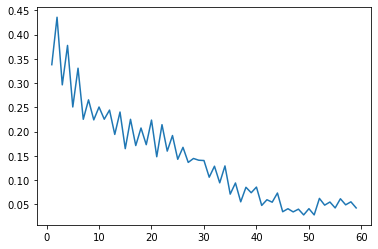

In [64]:
plt.plot(*zip(*result))

In [65]:
result[0:5]

[(1, 0.3379060828718275),
 (2, 0.4357160043582774),
 (3, 0.29629757214934654),
 (4, 0.37760481064828894),
 (5, 0.25069433834139715)]

In [67]:
modelK = KNeighborsClassifier(n_neighbors=2)
modelK.fit(X_train_freq_scaled, y_train)
s = make_scorer(f1_score, pos_label='bad')
scores = cross_val_score(modelK, X_train_freq_scaled, y_train, cv=5, scoring=s)
y_pred = cross_val_predict(modelK, X_train_freq_scaled, y_train, cv=5)
print("f1_score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

f1_score: 0.44 (+/- 0.03)


In [68]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_pred))
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_train, y_pred))

[[153 119]
 [278 350]]
              precision    recall  f1-score   support

         bad       0.35      0.56      0.44       272
        good       0.75      0.56      0.64       628

    accuracy                           0.56       900
   macro avg       0.55      0.56      0.54       900
weighted avg       0.63      0.56      0.58       900



# Usando ensemble models (RandomForest)

Vamos usar o mesmo pré-processamento utilizado para o algoritmo Knn

In [71]:
from sklearn.ensemble import RandomForestClassifier 

min_estimators = 100
max_estimators = 4000
step = 100
result = []
for i in range(min_estimators, max_estimators+step, step):
    clf = RandomForestClassifier(n_estimators=i, max_depth=None, random_state=0)
    s = make_scorer(f1_score, pos_label='bad')
    scores = cross_val_score(clf, X_train_freq_scaled, y_train, cv=5, scoring=s)
    result.append((i, scores.mean()))

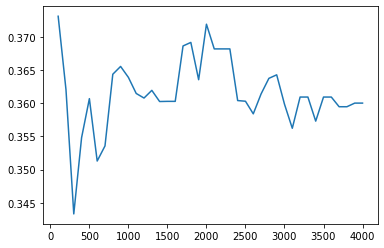

In [72]:
plt.plot(*zip(*result))

In [73]:
result[0:5]

[(100, 0.37315019299531016),
 (200, 0.36207747225560183),
 (300, 0.3433009815274512),
 (400, 0.35481193073532336),
 (500, 0.360706975295915)]

In [75]:
clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)
s = make_scorer(f1_score, pos_label='bad')
scores = cross_val_score(clf, X_train_freq_scaled, y_train, cv=5, scoring=s)
y_pred = cross_val_predict(clf, X_train_freq_scaled, y_train, cv=5)
print("f1_score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

f1_score: 0.37 (+/- 0.08)


In [76]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_pred))
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_train, y_pred))

[[ 81 191]
 [ 79 549]]
              precision    recall  f1-score   support

         bad       0.51      0.30      0.38       272
        good       0.74      0.87      0.80       628

    accuracy                           0.70       900
   macro avg       0.62      0.59      0.59       900
weighted avg       0.67      0.70      0.67       900



# Usando BalancedRandomForestClassifier

https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.ensemble.BalancedRandomForestClassifier.html

In [77]:
import warnings
warnings.filterwarnings('ignore')
from imblearn.ensemble import BalancedRandomForestClassifier 

min_estimators = 100
max_estimators = 4000
step = 100
result = []
for i in range(min_estimators, max_estimators+step, step):
    clf = BalancedRandomForestClassifier(n_estimators=i, max_depth=None, random_state=0)
    s = make_scorer(f1_score, pos_label='bad')
    scores = cross_val_score(clf, X_train_freq_scaled, y_train, cv=5, scoring=s)
    result.append((i, scores.mean()))

Using TensorFlow backend.


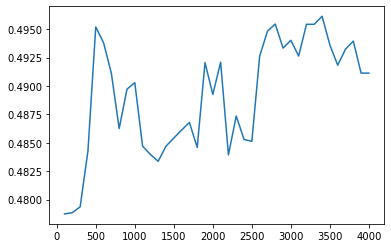

In [78]:
plt.plot(*zip(*result))

In [79]:
max(result,key=lambda item:item[1])

(3400, 0.4961383269364602)

In [81]:
clf = BalancedRandomForestClassifier(n_estimators=3400, max_depth=None, random_state=0)
s = make_scorer(f1_score, pos_label='bad')
scores = cross_val_score(clf, X_train_freq_scaled, y_train, cv=5, scoring=s)
y_pred = cross_val_predict(clf, X_train_freq_scaled, y_train, cv=5)
print("f1_score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

f1_score: 0.50 (+/- 0.03)


In [82]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_pred))
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_train, y_pred))

[[172 100]
 [247 381]]
              precision    recall  f1-score   support

         bad       0.41      0.63      0.50       272
        good       0.79      0.61      0.69       628

    accuracy                           0.61       900
   macro avg       0.60      0.62      0.59       900
weighted avg       0.68      0.61      0.63       900

